In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文黑体显示
%matplotlib inline
import os
os.chdir('E:\jupyter_program\数据处理\餐厅')
print(os.getcwd())

E:\jupyter_program\数据处理\餐厅


In [2]:
# 加载数据
data1 = pd.read_excel('meal_order_detail.xlsx', sheet_name='meal_order_detail1')
data2 = pd.read_excel('meal_order_detail.xlsx', sheet_name='meal_order_detail2')
data3 = pd.read_excel('meal_order_detail.xlsx', sheet_name='meal_order_detail3')

In [3]:
# 数据预处理
data = pd.concat([data1, data2, data3], axis=0) # 按行拼接数据
# data.head(5)
# data.info()
data.dropna(axis=1, inplace=True) # 删除包含缺失值的列，inplace=True直接在原始数据上改
data.head(5)
#data.info()

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442


In [4]:
# 数据分析
# 数据量大时，numpy比pandas更快
# 菜名频数统计
count = data['dishes_name'].value_counts()[:10]
count


dishes_name
白饭/大碗        323
凉拌菠菜         269
谷稻小庄         239
麻辣小龙虾        216
辣炒鱿鱼         189
芝士烩波士顿龙虾     188
五色糯米饭(七色)    187
白饭/小碗        186
香酥两吃大虾       178
焖猪手          173
Name: count, dtype: int64

0 323
1 269
2 239
3 216
4 189
5 188
6 187
7 186
8 178
9 173


<Axes: xlabel='dishes_name'>

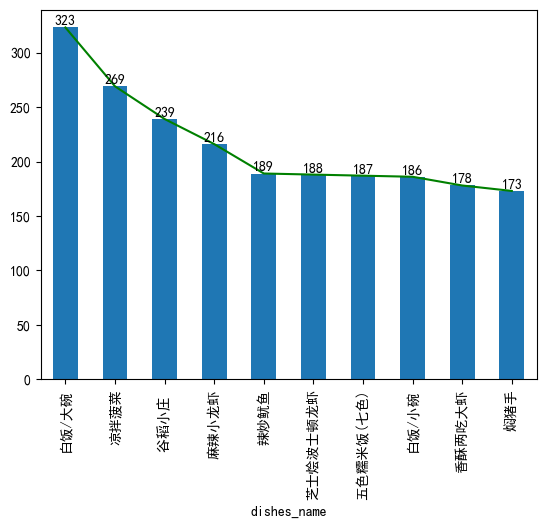

In [5]:
# 数据可视化
for x,y in enumerate(count):
    print(x, y)
    plt.text(x, y+2, y, ha='center', fontsize=10)
#   plt.text(坐标x值, 坐标y值, 内容, 其他设置)
count.plot(kind='line', color='g')   # 折线图
count.plot(kind='bar', fontsize=10)  # 柱状图

***其他操作***

([], [])

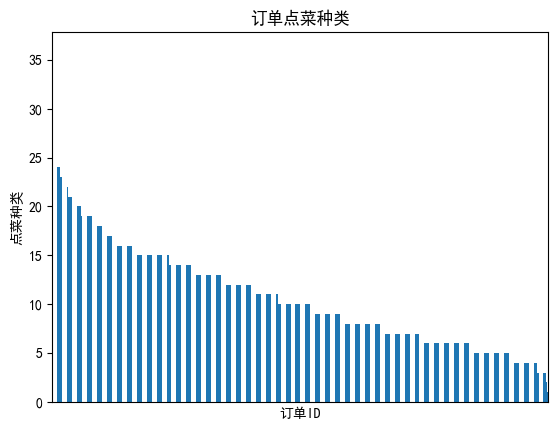

In [6]:
# 订单点菜种类
data_group = data['order_id'].value_counts()[:]  # 计算Top x就改成[:x]并取消注释部分
data_group.plot(kind='bar', fontsize=10)
#for x,y in enumerate(data_group):
#    plt.text(x, y + 0.1, y, ha='center', fontsize=10)
plt.title('订单点菜种类')
plt.xlabel('订单ID', fontsize=10)
plt.ylabel('点菜种类', fontsize=10)
plt.xticks([])

Text(0.5, 1.0, '订单ID点菜数量Top10')

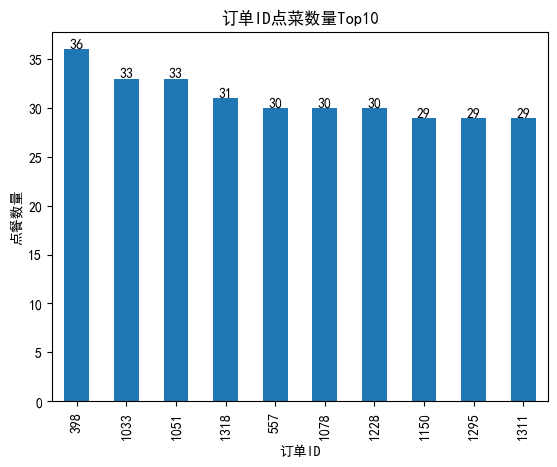

In [7]:
# 点菜数量最多
data['total_amounts'] = data['counts'] * data['amounts']  # 订单总价
dataGroup = data[['order_id', 'counts', 'amounts', 'total_amounts']].groupby(by='order_id')
Group_sum = dataGroup.sum()

sort_counts = Group_sum.sort_values(by='counts', ascending=False)[:10]
sort_counts['counts'].plot(kind='bar', fontsize=10)

for x, y in enumerate(sort_counts['counts']):
    plt.text(x, y + 0.1, y, ha='center', fontsize=10)
plt.xlabel('订单ID')
plt.ylabel('点餐数量')
plt.title('订单ID点菜数量Top10')

Text(0.5, 1.0, '订单ID点菜总价Top10')

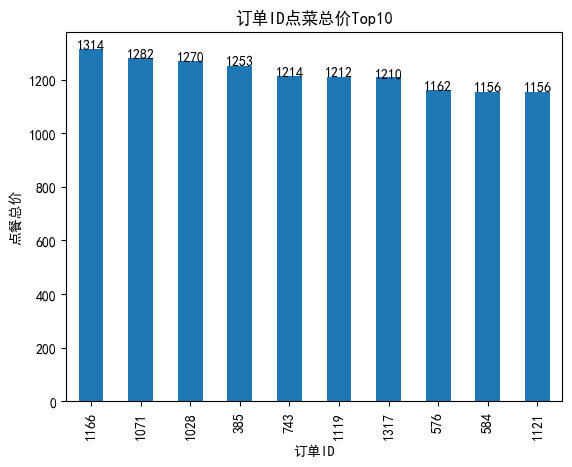

In [8]:
# 点菜总价最多
sort_counts = Group_sum.sort_values(by='total_amounts', ascending=False)[:10]
sort_counts['total_amounts'].plot(kind='bar', fontsize=10)

for x, y in enumerate(sort_counts['total_amounts']):
    plt.text(x, y + 0.1, y, ha='center', fontsize=10)
plt.xlabel('订单ID')
plt.ylabel('点餐总价')
plt.title('订单ID点菜总价Top10')

Text(0.5, 1.0, '点菜均价Top10')

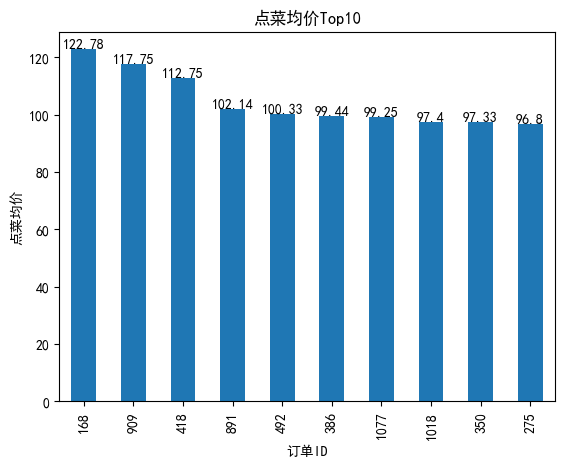

In [9]:
# 点菜均价Top10
Group_sum['average'] = Group_sum['total_amounts'] / Group_sum['counts']
Group_sum_sorted = Group_sum.sort_values(by='average', ascending=False)[:10].round(2)
Group_sum_sorted['average'].plot(kind='bar', fontsize=10)


for x, y in enumerate(Group_sum_sorted['average']):
    plt.text(x, y + 0.3, y, ha = 'center', fontsize=10)
plt.xlabel('订单ID')
plt.ylabel('点菜均价')
plt.title('点菜均价Top10')

([], [])

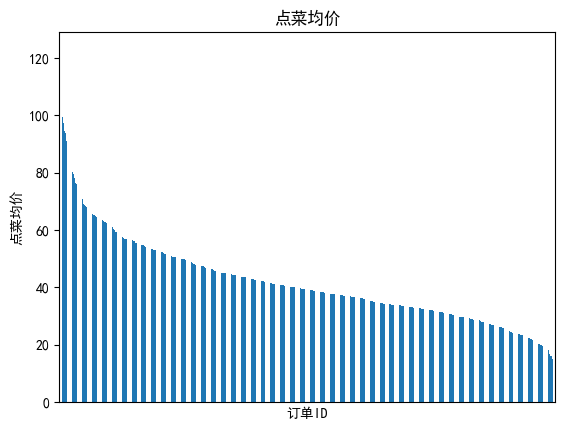

In [10]:
#分析消费均价分布
Group_sum_sorted = Group_sum.sort_values(by='average', ascending=False)[:].round(2)
Group_sum_sorted['average'].plot(kind='bar')
plt.xlabel('订单ID')
plt.ylabel('点菜均价')
plt.title('点菜均价')
plt.xticks([])

Text(0.5, 1.0, '点菜数与小时关系')

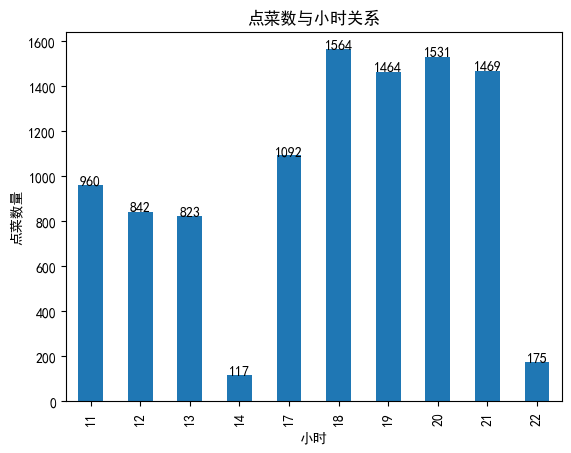

In [11]:
#分析点菜量集中时段
data['hour_count'] = 1  #新列，作为计数器
data['time'] = pd.to_datetime(data['place_order_time'])  # 将时间转换成日期类型存储到新列
data['hour'] = data['time'].map(lambda x:x.hour)  # 取出小时
group_by_hour = data.groupby(by='hour').count()['hour_count']
group_by_hour.plot(kind='bar')

for x, y in enumerate(group_by_hour):
    plt.text(x, y + 0.7, y, ha = 'center', fontsize=10)
plt.xlabel('小时')
plt.ylabel('点菜数量')
plt.title('点菜数与小时关系')

查询日历可知2016年8月1日为周一


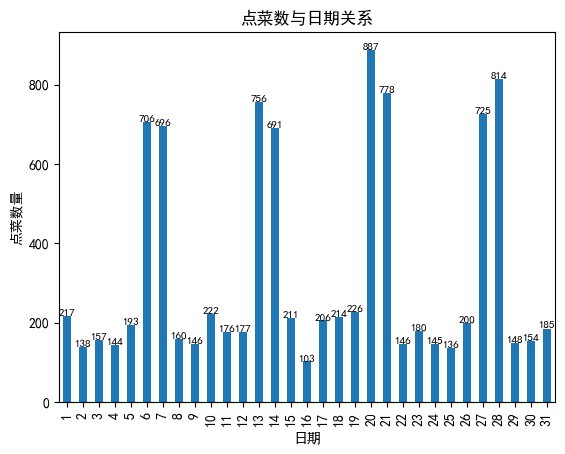

In [12]:
# 那一天订餐量最多
data['day_count'] = 1
data['day'] = data['time'].map(lambda x:x.day)
group_by_day =  data.groupby(by='day').count()['day_count']
group_by_day.plot(kind='bar')
for x, y in enumerate(group_by_day):
    plt.text(x, y + 0.7, y, ha = 'center', fontsize=8)
plt.xlabel('日期')
plt.ylabel('点菜数量')
plt.title('点菜数与日期关系')
print("查询日历可知2016年8月1日为周一")

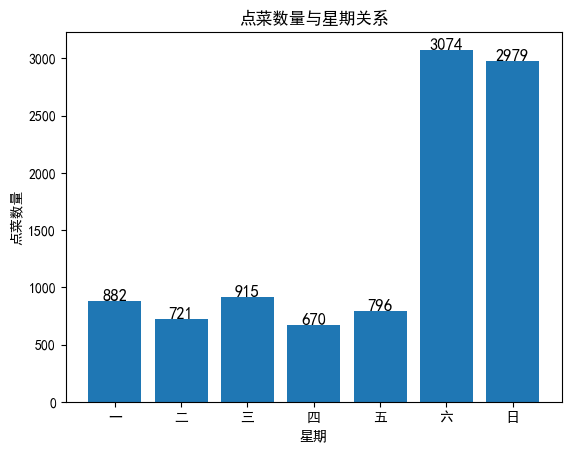

In [13]:
#查看星期几订餐数最多
data['week_count'] = 1
data['week_day'] = data['time'].map(lambda x:x.weekday())
weekdays = ['一', '二', '三', '四', '五', '六', '日']

group_by_weekday = data.groupby(by='week_day').count()['week_count']
plt.bar(weekdays, group_by_weekday)

for x, y in enumerate(group_by_weekday):
    plt.text(x, y + 1.3, y, ha = 'center', fontsize=12)
plt.xlabel('星期')
plt.ylabel('点菜数量')
plt.title('点菜数量与星期关系')
plt.show()